# Anomaly detection

# Loading the data

In [296]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import os

In [297]:
os.listdir()

['.ipynb_checkpoints',
 'Anamoly detection.ipynb',
 'ex8data1.mat',
 'ex8data2.mat',
 'ex8_movieParams.mat',
 'ex8_movies.mat',
 'K-means & PCA.ipynb',
 'Recommender system.ipynb']

In [298]:
data1 = loadmat('ex8data1.mat')

In [299]:
type(data1)

dict

In [300]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [301]:
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

In [302]:
print(X.shape)
print(Xval.shape)
print(yval.shape)
print(X[305,:])

(307, 2)
(307, 2)
(307, 1)
[18.26118844 17.978309  ]


# Vizualize 2D plot

In [303]:
def plot_data(X):
    plt.scatter(X[:,0],X[:,1],c='b',marker='.')
    plt.xlabel('Latency(ms)')
    plt.ylabel('Throughput(mb/s)')

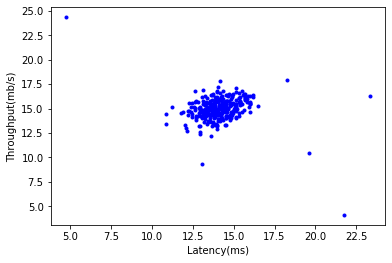

In [304]:
plot_data(X)

# Gaussian distribution

In [305]:
def meanvariance(X):
    
    mean = np.mean(X,axis=0,keepdims=True)
    variance = np.var(X,axis=0,keepdims=True)
    return mean,variance  #return flatten array of size(1,n)

In [306]:
#using product formula and for loop

def estimategaussian(X,mean,variance):
    
    mean = mean.T
    variance= variance.T
    px = np.ones((len(X),1))
    for i in range(len(X)):
        for j in range(len(mean)):
            px[i]*= (1/(np.sqrt(2*np.pi*variance[j])))*(np.exp(-((X[i][j]-mean[j])**2)/(2*variance[j])))
    
    return px
    
    

In [307]:
def multivariategaussian(X,mean,variance):
    
    mean = mean.T
    variance = variance.T
    m,n = X.shape
    sigma = np.dot(X.T,X)/len(X)  #covriance matrix

    first = (1/(2*np.pi)**(n/2)*np.sqrt(np.linalg.det(sigma)))
    second = (np.exp(-0.5* np.transpose(np.dot(np.linalg.inv(sigma),(X-mean.T).T)) * (X-mean.T) ))
    
    px =  first * second
    px = px[:,0]*px[:,1]
    return px

In [308]:
"""""
def multivariateGaussian(X, mu, sigma2):
    k = np.size(mu,1)
    if ((np.size(sigma2,0) == 1) | (np.size(sigma2,1) == 1)):
        sigma2 = np.diagflat(sigma2)
    # De-mean 
    X = X - mu
    print("Sigma2: ",sigma2.shape)
    # Calculate p-values
    p = ((1 / (2* (np.pi)**(-k / 2) * np.linalg.det(sigma2)**(-.5))) *np.exp(-.5 * np.sum(np.dot(X, np.linalg.inv(sigma2)) * X, 1)))
    return p
    """""

'""\ndef multivariateGaussian(X, mu, sigma2):\n    k = np.size(mu,1)\n    if ((np.size(sigma2,0) == 1) | (np.size(sigma2,1) == 1)):\n        sigma2 = np.diagflat(sigma2)\n    # De-mean \n    X = X - mu\n    print("Sigma2: ",sigma2.shape)\n    # Calculate p-values\n    p = ((1 / (2* (np.pi)**(-k / 2) * np.linalg.det(sigma2)**(-.5))) *np.exp(-.5 * np.sum(np.dot(X, np.linalg.inv(sigma2)) * X, 1)))\n    return p\n    '

In [309]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)

        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

pval = estimategaussian(Xval, mean, variance)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269492e-05
Best F1 on Cross Validation Set: 0.8750000000000001


E:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [310]:
mean,variance = meanvariance(X)

In [311]:
print(mean.shape)
print(variance.shape)

(1, 2)
(1, 2)


In [312]:
px = estimategaussian(X,mean,variance)

In [313]:
outliers= np.where(px<epsilon)

In [314]:
print("Number of anamolies are: ",(outliers[0]))

Number of anamolies are:  [300 301 303 304 305 306]


In [327]:
def plot_outliers(X,outliers):
    plt.scatter(X[:,0],X[:,1],c='b',marker='.')
    plt.scatter(X[outliers[0],0],X[outliers[0],1],marker='o',facecolor='none',edgecolor='r',s=100)
    plt.title('Points in red are anamolous points')


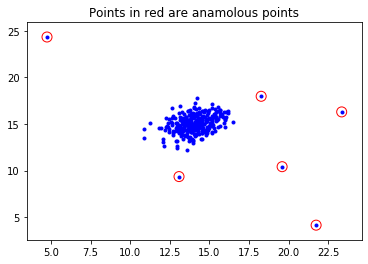

In [328]:
plot_outliers(X,outliers)

# HighDimensional Dataset

In [64]:
os.listdir()


['.ipynb_checkpoints',
 'ex8data1.mat',
 'ex8data2.mat',
 'ex8_movieParams.mat',
 'ex8_movies.mat',
 'K-means & PCA.ipynb',
 'Untitled.ipynb']

In [65]:
data2 = loadmat('ex8data2.mat')

In [66]:
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [102]:
X_mul = data2['X']
X_mul_val = data2['Xval']
y_mul_val = data2['yval']

In [103]:
print(X_mul.shape)

(1000, 11)


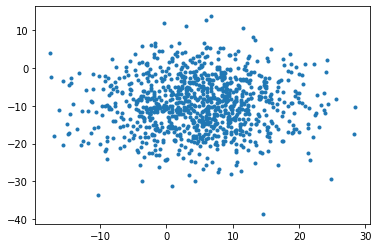

In [139]:
plt.scatter(X_mul[:,0],X_mul[:,1],marker='.')

In [242]:
pval = estimategaussian(X_mul_val, mean_mul, variance_mul)
epsilon_mul, F1 = selectThreshold(y_mul_val, pval)
print("Best epsilon found using cross-validation:",epsilon_mul)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 1.377228890761357e-18
Best F1 on Cross Validation Set: 0.6153846153846154


E:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [243]:
mean_mul,variance_mul = meanvariance(X_mul) 
print(mean_mul.shape)
px_mul = estimategaussian(X_mul,mean_mul,variance_mul)

(1, 11)


In [244]:
outliers_mul = np.where(px_mul<epsilon_mul)

In [245]:
print("Number of Anamolies are: ",len(outliers_mul[0]))


Number of Anamolies are:  117


# Ploting outliers in 3-D

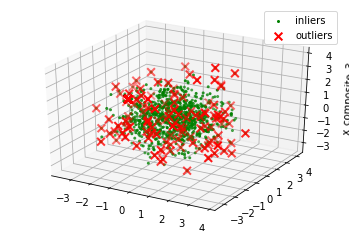

In [246]:
# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_mul)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

#plot '.' for the inliners in green
# Plot x's for the outliers in red

ax.scatter(X_reduce[outliers_mul,0],X_reduce[outliers_mul,1], X_reduce[outliers_mul,2],lw=2, s=60, marker="x", c="red", label="outliers")

ax.legend()
plt.show()

# Plotting the outliers in 2-D

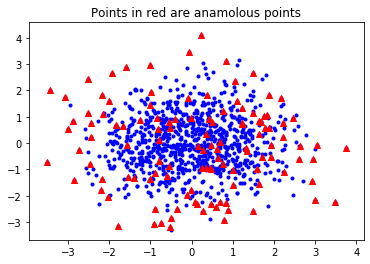

In [258]:
pca = PCA(n_components=2)  # Reduce to k=2 dimensions
scaler = StandardScaler()
#normalize the metrics
X_norm = scaler.fit_transform(X_mul)
X_reduce = pca.fit_transform(X_norm)

plot_outliers(X_reduce,outliers_mul)

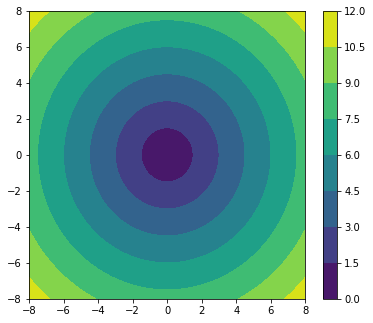

In [263]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
